# Canopy Curated Movies

Canopy is a boutique streaming service that plans to cater to the viewers of French-language movies. Their business goals, as a streaming service provider, are to: offer curated selections of the best-rated French-language movies from the existing content, make French-language movies available to various age groups, identify the least tapped genres to provide the filmmakers with data to make original content for Canopy.

Our Goal:
In this project, we are going to analyze movie datasets to gather insights that adhere to the strategic objectives to expand Canopy streaming services. The key analytical details that are answered as a result of the analysis include:

Find the top 20 movies in each genre that is available in the French language, 
Analyze the genre distribution in French-language movies, 
Analyze French Movies by Age Group and Genre, 
Analyze French Movies by Streaming Platform, 
Make Curated collection of movies by, Rating, Year of release, Rating of the directors.



# Why Python for our data analysis?

Python is one of the best programming languages available for data analysis. It offers a variety of libraries such as NumPy, Pandas, Matplotlib etc. specifically designed for analysis and visualizations purposes. These libraries simplify the complexity of data analysis tasks and help to derive valuable insights and trends. 
As the data source used for the analysis is of csv type, Python provides a simple coding syntax for loading and reading csv type data. The Pandas library helps to convert the data into dataframe for easy readability and data manipulation.
With visualization libraries we can easily convert the manipulated data into charts and plots.


# Importing Python Libraries

In [1]:
#Import required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import seaborn as sns

# Loading and Merging Dataset

The csv files are downloaded and saved into a folder called dataset. The read_csv() function helps to import the data from csv files to Pandas dataframe.

The merge() function helps to combine the two datasets into one. This helps in combining the categories that are common to both dataframe. From our analysis, Title of the movie is the common column connecting both datasets. The combined dataset will be henceforth called as movies dataset.

In [2]:
#Import and load data from csv files to dataframes
#csv files are saved inside a folder called dataset
#csv files are converted to dataframe using read_cvs() method
df_movie_info = pd.read_csv('./dataset/movies_info.csv')
df_movie_streaming_info = pd.read_csv('./dataset/movies_streaming_info.csv')

#Combine the two dataframes using merge() method and display the result
df_final = df_movie_info.merge(df_movie_streaming_info, on='Title')
df_final

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,ID,Netflix,Hulu,Prime Video,Disney+
0,Trigger Pals,1939,NaN,5.3,NaN,Sam Newfield,"Action,Adventure,Western",United States,English,59.0,15592,0,0,1,0
1,Open Grave,2013,18+,6.2,18%,Gonzalo López-Gallego,"Horror,Mystery,Thriller","United States,Hungary",English,102.0,9730,0,0,1,0
2,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8681,0,0,1,0
3,Beyond the Pale,2014,NaN,7.4,NaN,Ja-Ann Wang,"Short,Drama",United States,English,11.0,1987,0,0,1,0
4,White Tiger,1996,13+,5.0,NaN,Karen Shakhnazarov,"Action,Adventure,Fantasy,War",Russia,"Russian,German",104.0,16377,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,The High Cost of Living,2011,13+,6.8,53%,Deborah Chow,Drama,Canada,"English,French,Cantonese",92.0,13673,0,0,1,0
13419,Holiday Rush,2019,7+,4.8,NaN,Leslie Small,"Comedy,Romance",United States,English,92.0,6228,1,0,0,0
13420,Demolition Man,1993,18+,6.7,59%,Marco Brambilla,"Action,Sci-Fi,Thriller",United States,English,115.0,3911,0,1,0,0
13421,Fanney Khan,2018,NaN,4.5,63%,Atul Manjrekar,"Comedy,Drama,Music",India,NaN,130.0,4797,0,0,1,0


# Handling Missing Data

Handling the missing data is an important part of data analysis and manipulation. In order to clean data, we must find the total number of rows & columns in the dataset, columns names, non-null count and data type. This can be achieved using info() method of Python.

In our movies dataset, the total number of rows is 13423 and the non-Null count against each column is found using info() method.

The column Rotten Tomatoes has a minimum non-null count of 4121 rows and is not critical for the analysis. Hence, it can be removed from the dataframe with the help of drop() method.
The NaN values in the object data type columns such as Age, Language, Directors, Genres, Country are filled with the value ‘Not Specified’ using the fillana() method.
The NaN values in the integer data type columns such as IMDb, Runtime are filled with ‘-1’ using the fillana() method.


In [3]:
#Finding information about the merged dataframe with number of rows & columns, columns names, non-null count 
#and data type using info() method
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13423 entries, 0 to 13422
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            13423 non-null  object 
 1   Year             13423 non-null  int64  
 2   Age              5886 non-null   object 
 3   IMDb             12953 non-null  float64
 4   Rotten Tomatoes  4121 non-null   object 
 5   Directors        12837 non-null  object 
 6   Genres           13206 non-null  object 
 7   Country          13079 non-null  object 
 8   Language         12940 non-null  object 
 9   Runtime          12959 non-null  float64
 10  ID               13423 non-null  int64  
 11  Netflix          13423 non-null  int64  
 12  Hulu             13423 non-null  int64  
 13  Prime Video      13423 non-null  int64  
 14  Disney+          13423 non-null  int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 1.6+ MB


In [4]:
#Re-arrange the columns in the merged dataframe and display the result
col_order = ['ID', 'Title','Year','Language','Genres', 'Directors','Age','Country','Runtime','IMDb','Rotten Tomatoes','Netflix','Prime Video','Hulu','Disney+']
df_final = df_final[col_order]

In [5]:
#The column - Rotten Tomatoes has highest amount of null values. so removing it from the dataframe using drop method()
df_final = df_final.drop(['Rotten Tomatoes'], axis=1)

In [6]:
#Fill the object columns - Age, Language, Directors, Genres, Country with 'Not Specified' instead of null values.
df_final['Age'] = df_final['Age'].fillna('Not Specified')
df_final['Language'] = df_final['Language'].fillna('Not Specified')
df_final['Directors'] = df_final['Directors'].fillna('Not Specified')
df_final['Genres'] = df_final['Genres'].fillna('Not Specified')
df_final['Country'] = df_final['Country'].fillna('Not Specified')

#Fill the integer columns - IMDb, Runtime with '-1' instead of null values.
df_final['IMDb'] = df_final['IMDb'].fillna(-1)
df_final['Runtime'] = df_final['Runtime'].fillna(-1)

In [7]:
#Check null values count by columns using isna() method
df_final.isna().sum()

ID             0
Title          0
Year           0
Language       0
Genres         0
Directors      0
Age            0
Country        0
Runtime        0
IMDb           0
Netflix        0
Prime Video    0
Hulu           0
Disney+        0
dtype: int64

In [8]:
#Check for duplicate data
df_final.duplicated().any()

False

# Statistical Summary

The describe() method shows the statistical summary of numerical columns present in the dataframe. With the parameter include=’all’ provides the statistical summary of all the columns in the dataframe. The output shows the total count of movies, with minimum & maximum year of release, top language & genre etc. 

In [9]:
#As no null values and no duplicate data are found in the dataframe, Generate the Statistical Summary of df_final 
#for all the columns with include='all' parameter
df_final.describe(include='all')

,ID,Title,Year,Language,Genres,Directors,Age,Country,Runtime,IMDb,Netflix,Prime Video,Hulu,Disney+
count,13423.000000,13423,13423.000000,13423,13423,13423,13423,13423,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000
unique,NaN,13423,NaN,924,1697,9520,6,1091,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Trigger Pals,NaN,English,Drama,Not Specified,Not Specified,United States,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,8830,1081,586,7537,7035,NaN,NaN,NaN,NaN,NaN,NaN
mean,8371.433584,NaN,2002.987708,NaN,NaN,NaN,NaN,NaN,90.095955,5.663972,0.209715,0.741488,0.053267,0.033152
std,4829.592207,NaN,20.728652,NaN,NaN,NaN,NaN,NaN,33.098824,1.834910,0.407120,0.437833,0.224573,0.179040
min,1.000000,NaN,1913.000000,NaN,NaN,NaN,NaN,NaN,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,4172.500000,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,80.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,8338.000000,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,91.000000,6.000000,0.000000,1.000000,0.000000,0.000000
75%,12568.500000,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,103.000000,6.900000,0.000000,1.000000,0.000000,0.000000


From the above summary, we can arrive at the below results,
Total Number of Movies in the dataset - 13423, 
Unique Languages - 924, 
Minimum Year of movie released - 1913 and Maximum Year of movie released - 2020
Average Run time is 90 mins

# Top 20 French Movie in each genre

Let’s analyze the dataset to find top 20 movies in French language. Firstly, the data set is filtered to French language movies by setting a filter on language column with the value French. Also, the data set has other language movies that has been dubbed in French. We are going to use the French dubbed movies as well in our analysis. To categorize movies, we apply the below logic,

1)If the language of the movie is only French, it is categorized as a French Movie,
2)If the language of the movie has multiple languages and starts with French, it is categorized as a French Movie, 
3)If the language of the movie has multiple languages and French is not the first language and part of the language list, it is categorized as a French Dubbed, 
4)Else, it is categorized as Not French.

After categorizing the movies, we are going to categorize the genre for each movie. Once the individual genre for each movie is found, we are going to merge the rest of the information from the movies dataset with it. This allows us to add columns like Directors, Age, Year, Streaming platforms etc. for further analysis. To find the top 20 movies, we are going to use group the data with Genre and use nlargest() method.
This analysis will help Canopy to stream the top-rated French-language movies and French-dubbed movies for each genre. 



In [10]:
# Create a function to categorize french movies and french dubbed movies
# Let's apply the below logic
# 1)If the language of the movie is only French, it is categorized as French Movie
# 2)If the language of the movie has multiple languages and starts with French, it is categorized as French Movie
# 3)If the language of the movie has multiple languages and French is not the first language and just a part of language list
# then, it is categorized as French Dubbed
# 4)Else, it is categorized as Not French

def MovieType(language):
    if language=='French' or language.split(',')[0] == 'French':
        return 'French'
    if 'French' in language:
        return 'French Dubbed'
    else:
        return 'Not French'  

In [11]:
#Add a new column for french movie type in df_final, apply movie type category function and display the output
df_final['Movie Type'] = df_final['Language'].apply(MovieType)
df_french_movies = df_final[(df_final['Movie Type'] == 'French') | (df_final['Movie Type'] == 'French Dubbed')]
df_french_movies.head()

,ID,Title,Year,Language,Genres,Directors,Age,Country,Runtime,IMDb,Netflix,Prime Video,Hulu,Disney+,Movie Type
27,9219,Mystery of the Pink Dolphin,2015,"French,English,Portuguese,Dutch",Documentary,Eric Ellena,Not Specified,"France,Brazil",52.0,7.1,0,1,0,0,French
44,9193,My Revolution,2016,French,Drama,Ramzi Ben Sliman,Not Specified,France,80.0,3.5,0,1,0,0,French
48,14854,The Story of the Twelve Apostles,1999,"English,French,Spanish","Documentary,Short",Yanai Arfi,Not Specified,United States,26.0,6.6,0,1,0,0,French Dubbed
70,5524,Girl on a Bicycle,2013,"English,French,German,Italian","Comedy,Drama,Romance",Jeremy Leven,18+,"Germany,France",101.0,6.2,0,1,0,0,French Dubbed
100,10555,Razzia,2018,"French,German,Yiddish","Drama,History,War",Rose Bosch,Not Specified,"France,Germany,Hungary",115.0,6.2,0,1,0,0,French


In [12]:
#As Genres column has multiple genres combined together, Split the Genres and Title into single value 
df_frenchmovies_bygenres = [pd.Series(row['Title'],row['Genres'].split(",")) for _, row in df_french_movies.iterrows()]
#df_frenchmovies_bygenres

In [13]:
#Concatenate the dataframe with Genres and Title with column headers
df_frenchmovies_bygenres = pd.concat(df_frenchmovies_bygenres).reset_index()
df_frenchmovies_bygenres.columns = ['Genres','Title']
#df_frenchmovies_bygenres

In [14]:
#Renaming the column Genre to GenreByMovie and saving it in a new dataframe
df_frenchmovies_bygenres_bymovie = df_frenchmovies_bygenres.copy().rename(columns={ 'Genres': 'GenreByMovie'})
df_frenchmovies_bygenres_bymovie

,GenreByMovie,Title
0,Documentary,Mystery of the Pink Dolphin
1,Drama,My Revolution
2,Documentary,The Story of the Twelve Apostles
3,Short,The Story of the Twelve Apostles
4,Comedy,Girl on a Bicycle
...,...,...
1643,Biography,The Special Relationship
1644,Drama,The Special Relationship
1645,History,The Special Relationship
1646,Thriller,The Decline


In [15]:
#Merging the genre for individual movies with df_french_movies to get other details of the movie such as IMDB, Age, 
#Movie Type, Director, Streaming Platforms etc
df_grp_movies_bygenre_imdb  = df_french_movies.merge(df_frenchmovies_bygenres_bymovie, on='Title').reset_index()
columns = ['Title','GenreByMovie','IMDb','Movie Type','Age','Year','Directors','Netflix', 'Prime Video', 'Hulu', 'Disney+']
df_grp_movies_bygenre_imdb = df_grp_movies_bygenre_imdb[columns]
df_grp_movies_bygenre_imdb

,Title,GenreByMovie,IMDb,Movie Type,Age,Year,Directors,Netflix,Prime Video,Hulu,Disney+
0,Mystery of the Pink Dolphin,Documentary,7.1,French,Not Specified,2015,Eric Ellena,0,1,0,0
1,My Revolution,Drama,3.5,French,Not Specified,2016,Ramzi Ben Sliman,0,1,0,0
2,The Story of the Twelve Apostles,Documentary,6.6,French Dubbed,Not Specified,1999,Yanai Arfi,0,1,0,0
3,The Story of the Twelve Apostles,Short,6.6,French Dubbed,Not Specified,1999,Yanai Arfi,0,1,0,0
4,Girl on a Bicycle,Comedy,6.2,French Dubbed,18+,2013,Jeremy Leven,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1643,The Special Relationship,Biography,6.7,French Dubbed,16+,2010,Richard Loncraine,0,1,0,0
1644,The Special Relationship,Drama,6.7,French Dubbed,16+,2010,Richard Loncraine,0,1,0,0
1645,The Special Relationship,History,6.7,French Dubbed,16+,2010,Richard Loncraine,0,1,0,0
1646,The Decline,Thriller,5.9,French,Not Specified,2020,Patrice Laliberté,1,0,0,0


In [16]:
#Group the DataFrame by GenreByMovie with top 20 rows using nlargest() based on IMDB rating
top_movies_per_genre = df_grp_movies_bygenre_imdb.groupby('GenreByMovie').apply(lambda x: x.nlargest(20, 'IMDb')).reset_index(drop=True)
top_movies_per_genre

,Title,GenreByMovie,IMDb,Movie Type,Age,Year,Directors,Netflix,Prime Video,Hulu,Disney+
0,Inception,Action,8.8,French Dubbed,13+,2010,Christopher Nolan,1,0,0,0
1,Kill Bill: Vol. 1,Action,8.1,French Dubbed,18+,2003,Quentin Tarantino,0,0,1,0
2,Tomorrow,Action,8.0,French Dubbed,Not Specified,2019,Roland Emmerich,0,1,0,0
3,The Incredibles,Action,8.0,French Dubbed,7+,2004,Brad Bird,0,0,0,1
4,Captain America: The Winter Soldier,Action,7.7,French Dubbed,13+,2014,"Anthony Russo,Joe Russo",0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
400,Slow West,Western,6.9,French Dubbed,18+,2015,John Maclean,1,0,0,0
401,Django,Western,6.3,French Dubbed,13+,2017,Quentin Tarantino,0,1,0,0
402,Around the World in 80 Days,Western,5.9,French Dubbed,7+,2004,Frank Coraci,0,0,0,1
403,Luke and Lucy: The Texas Rangers,Western,5.6,French Dubbed,7+,2009,"Wim Bien,Mark Mertens",0,1,0,0


In [17]:
#Print the top 20 french movies in each genre
for genre, movies in top_movies_per_genre.groupby('GenreByMovie'):
    print(f"Genre: {genre}")
    print(movies[['Title', 'IMDb', 'Movie Type']])
    print()

Genre: Action
                                         Title  IMDb     Movie Type
0                                    Inception   8.8  French Dubbed
1                            Kill Bill: Vol. 1   8.1  French Dubbed
2                                     Tomorrow   8.0  French Dubbed
3                              The Incredibles   8.0  French Dubbed
4          Captain America: The Winter Soldier   7.7  French Dubbed
5                Mission: Impossible - Fallout   7.7  French Dubbed
6   Pirates of the Caribbean: Dead Man's Chest   7.3  French Dubbed
7                 Slugterra: Ghoul from Beyond   7.3  French Dubbed
8                             Southern Comfort   7.2  French Dubbed
9                            The International   7.2  French Dubbed
10                                  Robin Hood   7.2  French Dubbed
11                     The Siege of Jadotville   7.2  French Dubbed
12                         The Matrix Reloaded   7.2  French Dubbed
13                              Th

# Genre Distribution in French Movies

In order to find the genre distribution, lets group the dataframe created for French movies with genre and aggregate using count() method to find the total number of movies against each genre.

In [18]:
#Find number of french movies made from each genre using groupby() and count() method
df_grp_movies_bygenre = df_grp_movies_bygenre_imdb.groupby('GenreByMovie', sort=False)["Title"].count().reset_index(name ='Number of Movies').sort_values(by=['Number of Movies'], ascending=False)
df_grp_movies_bygenre

,GenreByMovie,Number of Movies
1,Drama,386
3,Comedy,147
12,Thriller,147
4,Romance,135
13,Action,92
0,Documentary,86
14,Adventure,85
9,Crime,76
11,Mystery,65
5,History,56


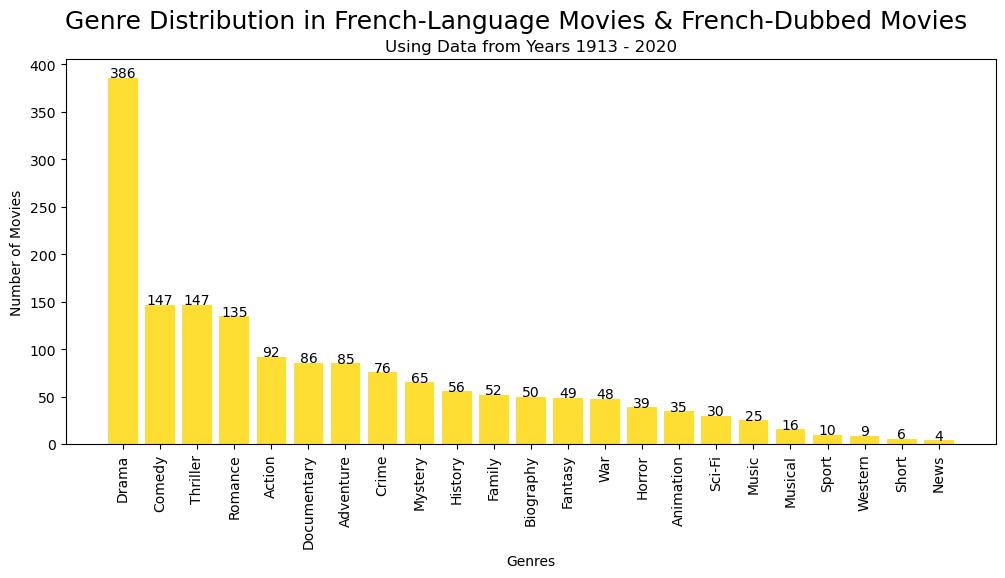

In [19]:
#Create bar plot to show Genre distribution
#Plot X Values and Y Values
plt.figure(figsize=(12, 5))  
plt.bar(df_grp_movies_bygenre['GenreByMovie'], df_grp_movies_bygenre['Number of Movies'], color='#ffde33')

plt.xticks(rotation=90)     
plt.xlabel('Genres', fontsize=10)
plt.ylabel('Number of Movies', fontsize=10)

#Add Main Title and Title for Subheadings
plt.suptitle('Genre Distribution in French-Language Movies & French-Dubbed Movies', fontsize=18)
plt.title('Using Data from Years 1913 - 2020', fontsize=12)  

#Add value labels to the bars
for i, v in enumerate(df_grp_movies_bygenre['Number of Movies']):
    plt.text(i, v+0.2, str(v), ha='center')

plt.show()

# Genre Distribution by Movie Type

In this analysis, we are going to find the genre distribution for French language movies and French dubbed movies

In [20]:
#Find number of french movies made from each genre, the average IMDB rating and movie type(french movie or french dubbed movie) using groupby(), mean() and count() method
#Sort the values by Movie Type and Number of Movies
df_grp_movies_bygenre_movietype = df_grp_movies_bygenre_imdb.groupby(['Movie Type','GenreByMovie']).agg({'IMDb': 'mean', 'Title': 'count'}).reset_index().sort_values(by=['Movie Type','Title'], ascending=False)
df_grp_movies_bygenre_movietype.columns=['Movie Type','GenreByMovie','IMDb', 'Number of Movies']
df_grp_movies_bygenre_movietype.round(2).head()

,Movie Type,GenreByMovie,IMDb,Number of Movies
30,French Dubbed,Drama,6.34,230
43,French Dubbed,Thriller,6.13,104
27,French Dubbed,Comedy,6.38,89
39,French Dubbed,Romance,6.31,83
23,French Dubbed,Action,6.18,76


In [21]:
#Grouping the result by movie type with the genre and number of french movies
df_frenchmovies_movietype = df_grp_movies_bygenre_movietype.groupby(['Movie Type','GenreByMovie']).sum().reset_index().sort_values(by=['Movie Type','IMDb'], ascending=False)
df_frenchmovies_movietype.round(2)

,Movie Type,GenreByMovie,IMDb,Number of Movies
38,French Dubbed,News,7.53,3
25,French Dubbed,Animation,6.83,21
26,French Dubbed,Biography,6.70,40
29,French Dubbed,Documentary,6.67,60
35,French Dubbed,Music,6.65,14
31,French Dubbed,Family,6.65,35
33,French Dubbed,History,6.61,39
41,French Dubbed,Short,6.60,1
45,French Dubbed,Western,6.59,8
36,French Dubbed,Musical,6.53,15


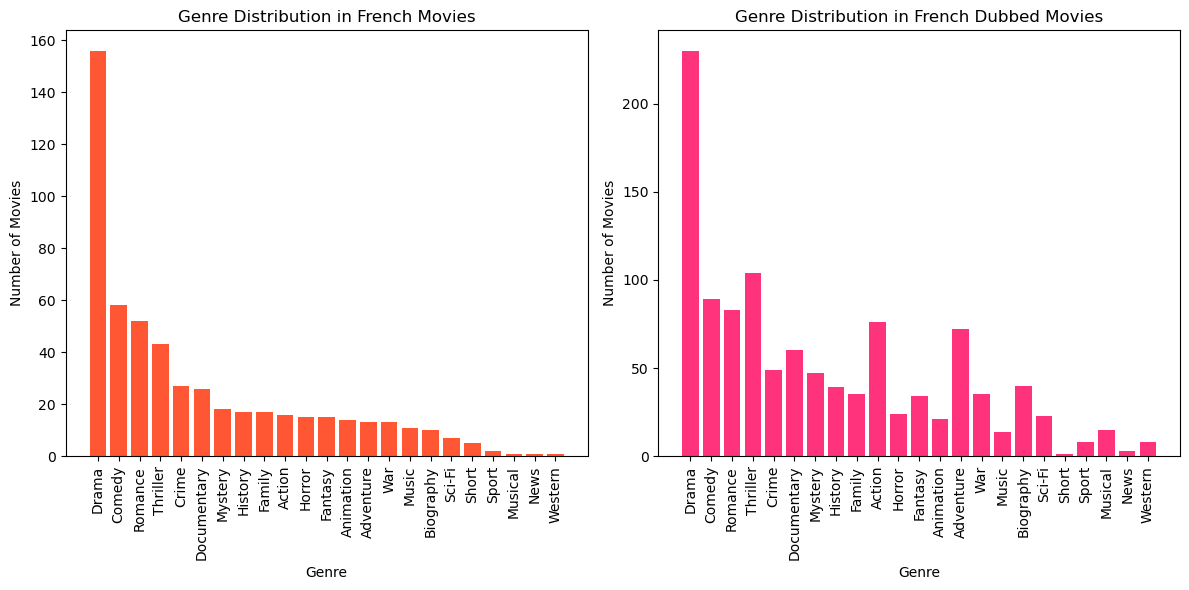

In [43]:
# Sort the data by 'Number of Movies' column
french_movies = french_movies.sort_values(by='Number of Movies', ascending=False)
french_dubbed_movies = french_dubbed_movies.sort_values(by='Number of Movies', ascending=False)

# Create subplots for the bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# Bar chart for French movies
axes[0].bar(french_movies['GenreByMovie'], french_movies['Number of Movies'], color='#ff5733')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Genre Distribution in French Movies')

# Bar chart for French dubbed movies
axes[1].bar(french_dubbed_movies['GenreByMovie'], french_dubbed_movies['Number of Movies'], color='#ff337b')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Genre Distribution in French Dubbed Movies')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=90)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plots
plt.show()

From the above charts, the least tapped genres in French movies are Western, Musical, Sport, Shor and Biography. Film makers can use this analysis to create original content in these genres.
The below analysis is based on average rating in each genre along with the total number of movies in French language and French dubbed movie.

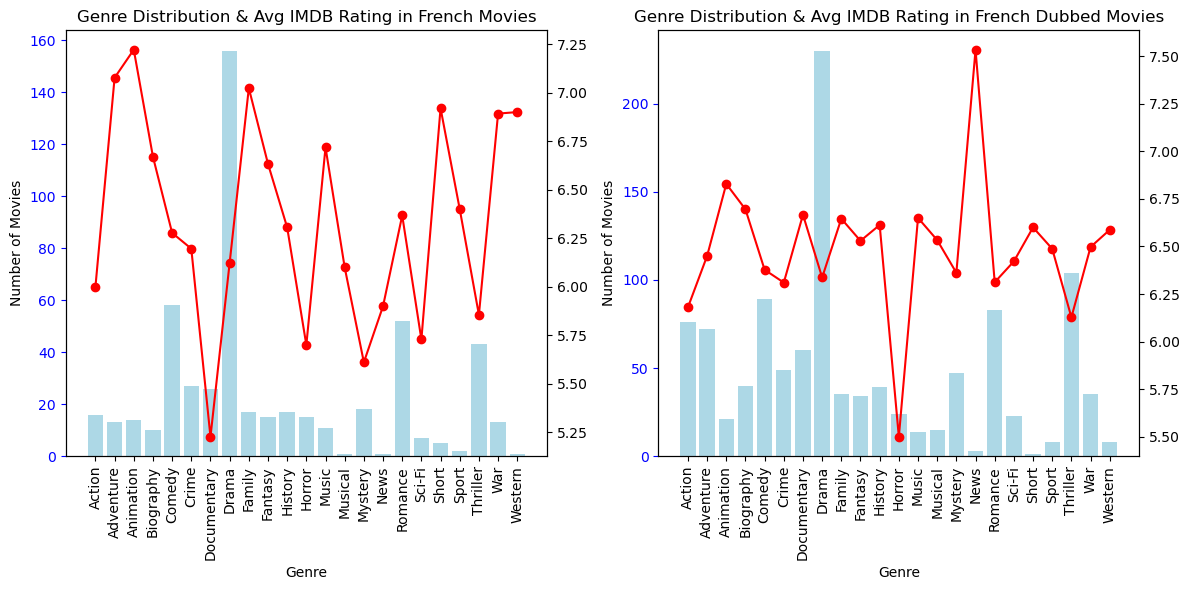

In [23]:
#Add chart for movie type with number of movies and avg rating
# Separate the data for each movie type
french_movies = df_frenchmovies_movietype[df_frenchmovies_movietype['Movie Type'] == 'French']
french_dubbed_movies = df_frenchmovies_movietype[df_frenchmovies_movietype['Movie Type'] == 'French Dubbed']

# Sort the data by GenreByMovie column
french_movies = french_movies.sort_values(by='GenreByMovie')
french_dubbed_movies = french_dubbed_movies.sort_values(by='GenreByMovie')

# Create subplots for the bar charts and line chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# Bar chart for French movies
axes[0].bar(french_movies['GenreByMovie'], french_movies['Number of Movies'], color='lightblue')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Genre Distribution & Avg IMDB Rating in French Movies')

# Line chart for IMDb rating of French movies
axes[0].twinx().plot(french_movies['GenreByMovie'], french_movies['IMDb'], color='red', marker='o')
axes[0].tick_params(axis='y', colors='blue')

# Bar chart for French dubbed movies
axes[1].bar(french_dubbed_movies['GenreByMovie'], french_dubbed_movies['Number of Movies'], color='lightblue')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Genre Distribution & Avg IMDB Rating in French Dubbed Movies')

# Line chart for IMDb rating of French dubbed movies
axes[1].twinx().plot(french_dubbed_movies['GenreByMovie'], french_dubbed_movies['IMDb'], color='red', marker='o')
axes[1].tick_params(axis='y', colors='blue')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=90)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plots
plt.show()

News is the genre in the French-dubbed movies with the highest rating which French film makers can make original content. The least tapped genres in French-language movies are News, Short, Animations, Family, Biograph, History and so on.

# French Movies by Age Group and Genre

This analysis helps to understand genre distribution based on age groups. Drama has the highest number of movies made catering to 18+ ,13+, 7+ audience. Comedy has a mix of all age group audiences. Thriller, Romance and Crime are majorly made for 18 and above age group. The 7 and above age group are attracted to Fantasy, Animation and Adventure genres.
Canopy can use this analysis to curate movies to the audience as per the age.


In [24]:
#Group french movies by age and genre with the number of french movies
#Sort the output by age
df_frenchmovies_byage = df_grp_movies_bygenre_imdb.groupby(['Age','GenreByMovie'])['Title'].count().reset_index(name ='Number of Movies').sort_values(by=['Age'])
#Filtering the rows thaht has 'Not Specified' as value
df_frenchmovies_byage = df_frenchmovies_byage[df_frenchmovies_byage['Age'] != 'Not Specified']
df_frenchmovies_byage

,Age,GenreByMovie,Number of Movies
0,13+,Action,18
20,13+,Western,1
19,13+,War,6
18,13+,Thriller,17
17,13+,Sci-Fi,6
...,...,...,...
102,all,Animation,13
100,all,Action,1
112,all,Sci-Fi,1
105,all,Drama,7


C:\Users\mahal\AppData\Local\Temp\ipykernel_7656\3115544981.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = cm.get_cmap('tab20', len(genres))


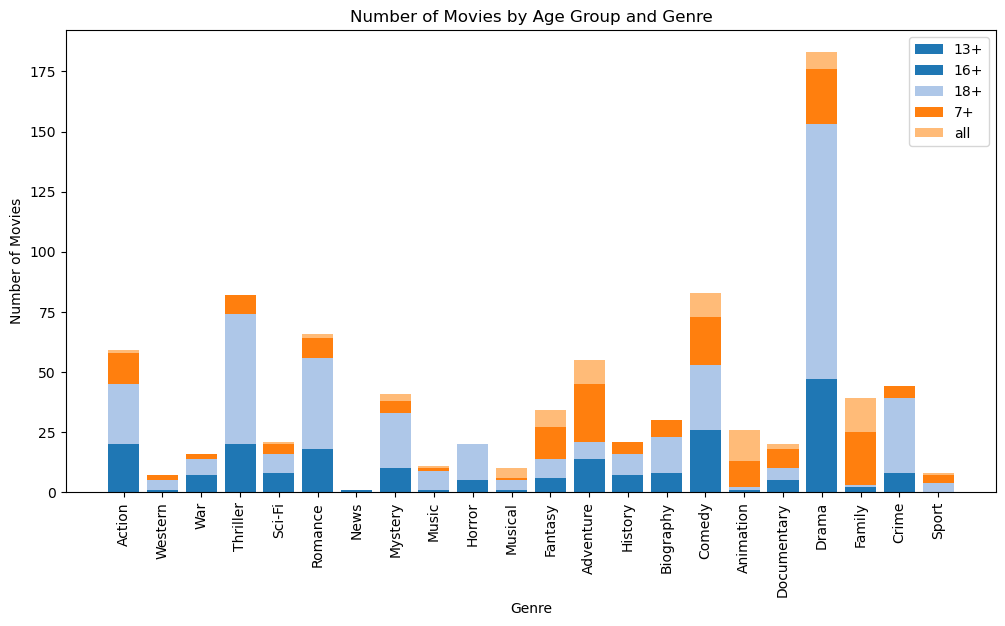

In [25]:
#Get unique age groups and genres
age_groups = df_frenchmovies_byage['Age'].unique()
genres = df_frenchmovies_byage['GenreByMovie'].unique()

#Create a color palette for the genres
color_palette = cm.get_cmap('tab20', len(genres))

#Initialize an empty array for movie counts
movie_counts = np.zeros((len(age_groups), len(genres)))

# Fill the movie counts array with the actual values
for i, age_group in enumerate(age_groups):
    age_data = df_frenchmovies_byage[df_frenchmovies_byage['Age'] == age_group]
    for j, genre in enumerate(genres):
        count = age_data[age_data['GenreByMovie'] == genre]['Number of Movies']
        if not count.empty:
            movie_counts[i, j] = count.values[0]

#Create the stacked bar chart
plt.figure(figsize=(12, 6))
bottom = None
for i in range(len(age_groups)):
    plt.bar(genres, movie_counts[i], bottom=bottom, color=color_palette(i), label=age_groups[i])
    if bottom is None:
        bottom = movie_counts[i]
    else:
        bottom += movie_counts[i]
     
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Age Group and Genre')
plt.xticks(rotation=90)
plt.legend()
plt.show()


# French Movies by Streaming Platform

In order to find the movies streamed across various platforms, we are going to group the dataset with platforms and their IMDb rating. As we can see from the results below, Prime Video has streamed the highest number of movies followed by Netflix, Hulu and Disney+. Interestingly, Disney+ streams content with the average rating of 6.87 followed by Hulu, Netflix and Prime Video.  

In [26]:
#create a list to store streaming platforms and a dictinalry to store the output
#group the dataframe by streaming platforms and select the column IMDB to find the number of french movies & avg rating
streams = ['Netflix', 'Prime Video', 'Hulu', 'Disney+']
dict_a = {}
for stream in streams:
    a = df_grp_movies_bygenre_imdb[[stream, 'IMDb']].groupby([stream]).agg(['count', 'mean']).iloc[1,:].values    
    dict_a[stream] = a  
    df_stream = pd.DataFrame(dict_a, index=['Number of Movies', 'Avg IMDb Rating']).round(2)
df_stream

,Netflix,Prime Video,Hulu,Disney+
Number of Movies,434.00,1085.00,139.00,83.00
Avg IMDb Rating,6.44,6.24,6.45,6.87


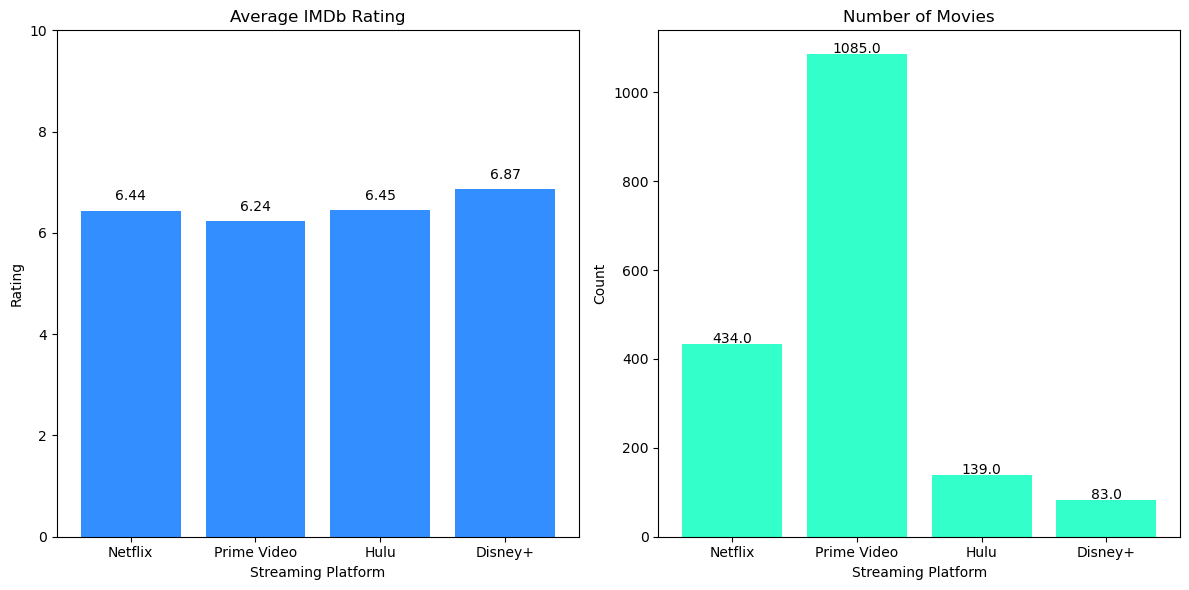

In [27]:
#Plotting the bar chart
plt.figure(figsize=(12, 6))

# Number of Movies
plt.subplot(1, 2, 2)
plt.bar(df_stream.columns, df_stream.loc['Number of Movies'], color='#33ffcb')
plt.title('Number of Movies')
plt.xlabel('Streaming Platform')
plt.ylabel('Count')

#Add value labels to the bars
for j, v in enumerate(df_stream.loc['Number of Movies']):
    plt.text(j, v+2.9, str(v), ha='center')
    
# Average IMDb Rating
plt.subplot(1, 2, 1)
plt.bar(df_stream.columns, df_stream.loc['Avg IMDb Rating'], color='#338fff')
plt.title('Average IMDb Rating')
plt.xlabel('Streaming Platform')
plt.ylabel('Rating')
plt.ylim(0, 10)

#Add value labels to the bars
for i, u in enumerate(df_stream.loc['Avg IMDb Rating']):
    plt.text(i, u+0.2, str(u), ha='center')

plt.tight_layout()
plt.show()

Let's find the genre distribution by streaming platforms such as Netflix, Prime Video, Hulu and Disney+.

In [28]:
#Find number of french movies available in Netflix made from each genre using groupby() and count() method
df_grp_movies_bygenre_netflix = df_grp_movies_bygenre_imdb[df_grp_movies_bygenre_imdb['Netflix']==1]
df_grp_movies_bygenre_netflix = df_grp_movies_bygenre_netflix.groupby('GenreByMovie', sort=False)["Title"].count().reset_index(name ='Number of Movies').sort_values(by=['Number of Movies'], ascending=False)
df_grp_movies_bygenre_netflix.head()

,GenreByMovie,Number of Movies
4,Drama,84
0,Comedy,50
8,Thriller,41
5,Romance,38
10,Action,31


In [29]:
#Find number of french movies available in Prime Video made from each genre using groupby() and count() method
df_grp_movies_bygenre_primevideo = df_grp_movies_bygenre_imdb[df_grp_movies_bygenre_imdb['Prime Video']==1]
df_grp_movies_bygenre_primevideo = df_grp_movies_bygenre_primevideo.groupby('GenreByMovie', sort=False)["Title"].count().reset_index(name ='Number of Movies').sort_values(by=['Number of Movies'], ascending=False)
df_grp_movies_bygenre_primevideo.head()

,GenreByMovie,Number of Movies
1,Drama,282
10,Thriller,100
3,Comedy,87
4,Romance,84
0,Documentary,58


In [30]:
#Find number of french movies available in Hulu made from each genre using groupby() and count() method
df_grp_movies_bygenre_hulu = df_grp_movies_bygenre_imdb[df_grp_movies_bygenre_imdb['Hulu']==1]
df_grp_movies_bygenre_hulu = df_grp_movies_bygenre_hulu.groupby('GenreByMovie', sort=False)["Title"].count().reset_index(name ='Number of Movies').sort_values(by=['Number of Movies'], ascending=False)
df_grp_movies_bygenre_hulu.head()

,GenreByMovie,Number of Movies
2,Drama,32
10,Romance,16
7,Comedy,13
8,Crime,12
4,Thriller,12


In [31]:
#Find number of french movies available in Disney+ made from each genre using groupby() and count() method
df_grp_movies_bygenre_disney = df_grp_movies_bygenre_imdb[df_grp_movies_bygenre_imdb['Disney+']==1]
df_grp_movies_bygenre_disney = df_grp_movies_bygenre_disney.groupby('GenreByMovie', sort=False)["Title"].count().reset_index(name ='Number of Movies').sort_values(by=['Number of Movies'], ascending=False)
df_grp_movies_bygenre_disney.head()

,GenreByMovie,Number of Movies
1,Adventure,15
2,Family,15
0,Animation,8
5,Action,8
13,Comedy,7


<Figure size 1000x600 with 0 Axes>

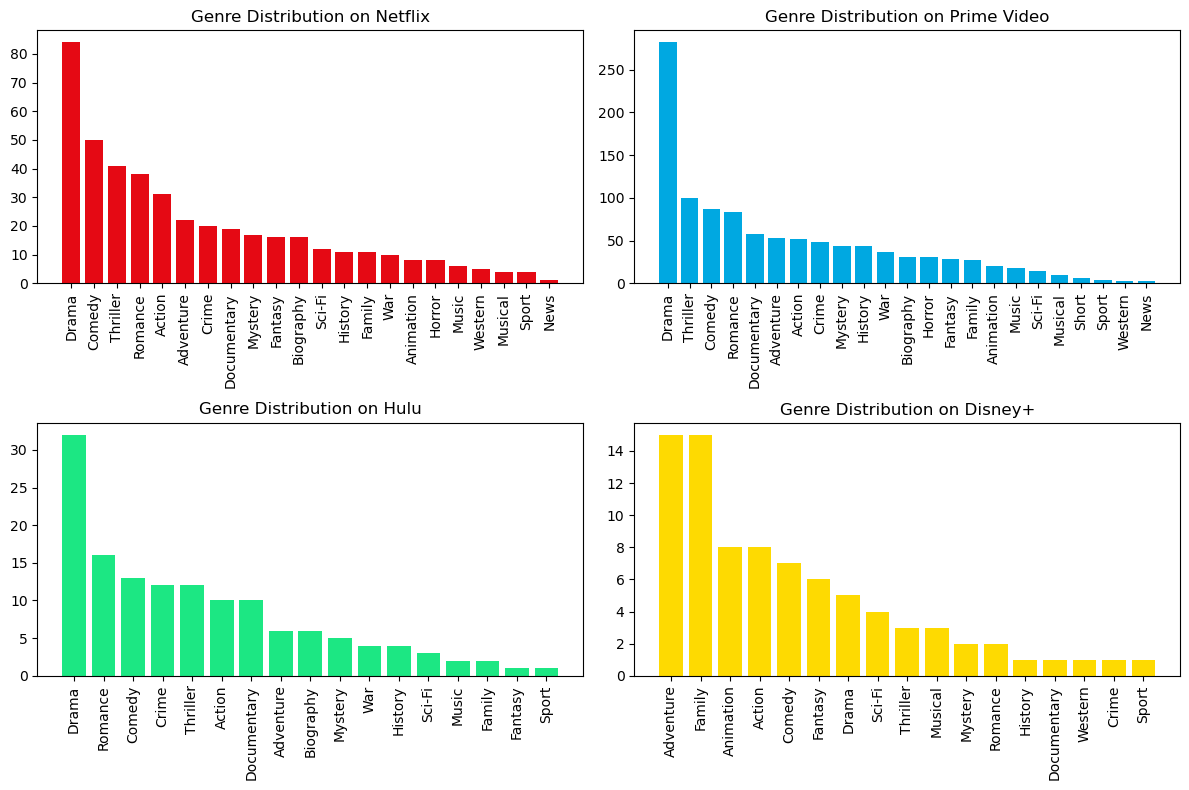

In [32]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create subplots for four bar charts
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot for Netflix
axes[0, 0].bar(df_grp_movies_bygenre_netflix['GenreByMovie'], df_grp_movies_bygenre_netflix['Number of Movies'], color='#E50914')
axes[0, 0].set_title('Genre Distribution on Netflix')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot for Prime Video
axes[0, 1].bar(df_grp_movies_bygenre_primevideo['GenreByMovie'], df_grp_movies_bygenre_primevideo['Number of Movies'], color='#00A8E1')
axes[0, 1].set_title('Genre Distribution on Prime Video')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot for Hulu
axes[1, 0].bar(df_grp_movies_bygenre_hulu['GenreByMovie'], df_grp_movies_bygenre_hulu['Number of Movies'], color='#1CE783')
axes[1, 0].set_title('Genre Distribution on Hulu')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot for Disney+
axes[1, 1].bar(df_grp_movies_bygenre_disney['GenreByMovie'], df_grp_movies_bygenre_disney['Number of Movies'], color='#FEDA01')
axes[1, 1].set_title('Genre Distribution on Disney+')
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


According to the above analysis, the least popular of all the platforms are Sport, Musical, Western, War, Sci-Fi and so on. These genres are underrepresented and could be a potential opportunity for Canopy to offer movies in these genres.

# French Movies by Collection

Canopy can offer curated collections of movies by rating, year of release, directors, actors, age group, genres etc. Below are three collections that canopy might be interested in.

Collection 1 : Top Rated Movies 

In this analysis, we are going to categorize IMDb rating as Excellent, Good and Average and save them in a new column as IMDB Category. We are going to apply the IMDbRating method and categorize movies based on their rating. The logic is,

1)If the rating is above 8.0, then it is categorized as Excellent
2)If the rating is between 6.0 and 7.9, then it is categorized as Good
3)Else, then it is categorized as Average

In [33]:
#Create a function to categorize IMDb rating as Excellent, Good and Average
def IMDbRating(rating):
    if rating>=8.0:
        return 'Excellent'
    if rating>=6.0:
        return 'Good'
    else:
        return 'Average' 

In [34]:
#Add a new column for IMDB Rating Category, apply IMDbRating() method and display the output
df_grp_movies_bygenre_imdb['IMDb_Category'] = df_grp_movies_bygenre_imdb['IMDb'].apply(IMDbRating)
df_grp_movies_bygenre_imdb.sort_values(by=['IMDb'], ascending=False)[:5]

,Title,GenreByMovie,IMDb,Movie Type,Age,Year,Directors,Netflix,Prime Video,Hulu,Disney+,IMDb_Category
96,Inception,Action,8.8,French Dubbed,13+,2010,Christopher Nolan,1,0,0,0,Excellent
99,Inception,Thriller,8.8,French Dubbed,13+,2010,Christopher Nolan,1,0,0,0,Excellent
98,Inception,Sci-Fi,8.8,French Dubbed,13+,2010,Christopher Nolan,1,0,0,0,Excellent
97,Inception,Adventure,8.8,French Dubbed,13+,2010,Christopher Nolan,1,0,0,0,Excellent
852,The Green Mile,Mystery,8.6,French Dubbed,18+,1999,Frank Darabont,0,0,1,0,Excellent


In [35]:
#Find french movie count by IMDb_category
IMDb_category_count = df_grp_movies_bygenre_imdb['IMDb_Category'].value_counts()
IMDb_category_count

Good         1123
Average       455
Excellent      70
Name: IMDb_Category, dtype: int64

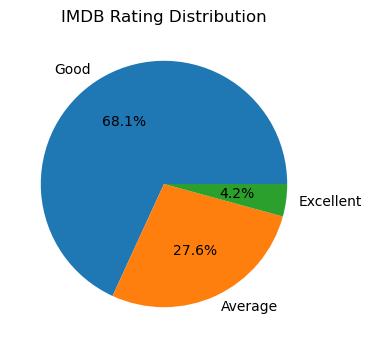

In [36]:
#Create a pie chart for IMDB Rating Distribution
plt.figure(figsize=(4, 4)) 
plt.pie(IMDb_category_count, labels=IMDb_category_count.index, autopct='%1.1f%%')
plt.title('IMDB Rating Distribution')
plt.show()

Canopy can create a collection of top-rated movies that falls under the Excellent category as ‘People’s choice’ and Good category as ‘Popular content’.

Collection 2 - French Movies by Year

In the next collection, we are going to group French movies based on year of release. Collecting movies by each decade can create groups like 1920s, 1980’s, 2000’s etc. Along with that, the average IMDb rating for each decade is calculated to see the rating trend over years.

In [37]:
#Create a function to categorize french movies by Year of release
def GroupByYear(year):
    if year>= 1920 and year <=1929:
        return '1920s'
    if year>= 1930 and year <=1939:
        return '1930s'
    if year>= 1940 and year <=1949:
        return '1940s'
    if year>= 1950 and year <=1959:
        return '1950s'
    if year>= 1960 and year <=1969:
        return '1960s'
    if year>= 1970 and year <=1979:
        return '1970s'
    if year>= 1980 and year <=1989:
        return '1980s'
    if year>= 1990 and year <=1999:
        return '1990s'
    if year>= 2000 and year <=2009:
        return '2000s'
    if year>= 2010 and year <=2019:
        return '2010s'
    if year>= 2020 and year <=2029:
        return '2020s'
    else:
        return 'Others' 

In [38]:
#Add a new column for Year Category, apply GroupByYear() method and display the output
df_grp_movies_bygenre_imdb['Year_Category'] = df_grp_movies_bygenre_imdb['Year'].apply(GroupByYear)
df_grp_movies_bygenre_imdb.sort_values(by=['Year'], ascending=True)

,Title,GenreByMovie,IMDb,Movie Type,Age,Year,Directors,Netflix,Prime Video,Hulu,Disney+,IMDb_Category,Year_Category
1395,The Last of the Mohicans,War,6.7,French Dubbed,Not Specified,1920,Michael Mann,0,1,0,0,Good,1920s
1394,The Last of the Mohicans,Romance,6.7,French Dubbed,Not Specified,1920,Michael Mann,0,1,0,0,Good,1920s
1393,The Last of the Mohicans,Drama,6.7,French Dubbed,Not Specified,1920,Michael Mann,0,1,0,0,Good,1920s
1392,The Last of the Mohicans,Adventure,6.7,French Dubbed,Not Specified,1920,Michael Mann,0,1,0,0,Good,1920s
1391,The Last of the Mohicans,Action,6.7,French Dubbed,Not Specified,1920,Michael Mann,0,1,0,0,Good,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,The Last Thing He Wanted,Mystery,4.2,French Dubbed,18+,2020,Dee Rees,1,0,0,0,Average,2020s
288,The Last Thing He Wanted,Drama,4.2,French Dubbed,18+,2020,Dee Rees,1,0,0,0,Average,2020s
1378,Sergio,Romance,6.1,French Dubbed,18+,2020,Greg Barker,1,0,0,0,Good,2020s
643,Penguins: Life on the Edge,Documentary,6.9,French Dubbed,Not Specified,2020,"Alastair Fothergill,Jeff Wilson",0,0,0,1,Good,2020s


In [39]:
#Find the average IMDb rating and number of french movies released by the categorized year
df_frenchmovies_byyear= df_grp_movies_bygenre_imdb.groupby(['Year_Category']).agg({'IMDb': 'mean', 'Title': 'count'}).reset_index().sort_values(by=['Year_Category'])
df_frenchmovies_byyear.columns= ['Year', 'Avg IMDb Rating' ,'Number of Movies']
df_frenchmovies_byyear.round(2)

,Year,Avg IMDb Rating,Number of Movies
0,1920s,6.92,9
1,1930s,6.34,21
2,1940s,6.67,31
3,1950s,6.77,41
4,1960s,6.77,28
5,1970s,6.50,69
6,1980s,6.66,62
7,1990s,6.72,90
8,2000s,6.33,346
9,2010s,6.24,930


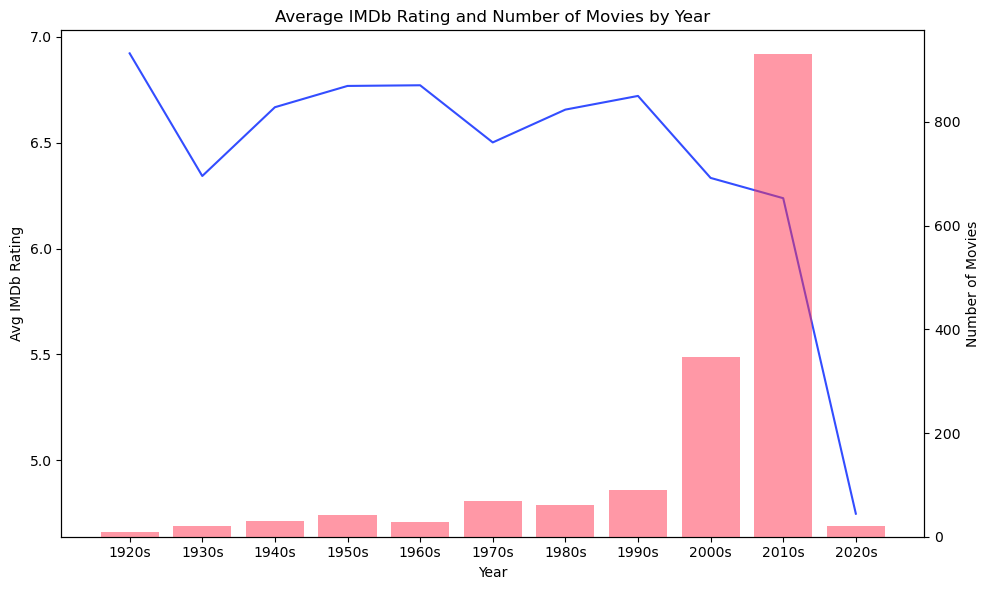

In [40]:
#Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#Plot the average IMDb rating
ax1.plot(df_frenchmovies_byyear['Year'], df_frenchmovies_byyear['Avg IMDb Rating'], color='#334dff')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg IMDb Rating')
ax1.set_title('Average IMDb Rating and Number of Movies by Year')

#Create the second y-axis for the number of movies
ax2 = ax1.twinx()
ax2.bar(df_frenchmovies_byyear['Year'], df_frenchmovies_byyear['Number of Movies'], color='#ff334e', alpha=0.5)
ax2.set_ylabel('Number of Movies')

#Display the plot
plt.tight_layout()
plt.show()

This helps Canopy to create collections like Nostalgic movies, Cult Classics etc. It can be catered according to the age of the viewers as their childhood movies, all-time favorite movies etc.

Collection 3 - Movies by Top Directors

Directors are one of the top reasons to watch a movie. It makes it easier for the viewers to choose top directors movies from a director list. We are going to find the top-rated French movie directors with the number of movies and average rating.

In [41]:
#Group the dataframe by Director and find IMDb rating and number of french movies. . 
#Find top 20 directors using nlargest() method
df_director_avgrating = df_grp_movies_bygenre_imdb.groupby('Directors').agg({'IMDb': 'mean', 'Title': 'count'}).reset_index().nlargest(20, 'IMDb')
df_director_avgrating = df_director_avgrating.sort_values('IMDb', ascending=False)
df_director_avgrating.columns = ['Directors', 'Avg IMDb Rating', 'Number of Movies']
df_director_avgrating

,Directors,Avg IMDb Rating,Number of Movies
94,Christopher Nolan,8.80,4
172,Frank Darabont,8.60,4
533,Tim Johnson,8.60,6
114,Daniel Schmidt,8.60,2
4,Adam Mazo,8.30,4
59,Bernardo Arsuaga,8.30,1
179,Fredric Lean,8.20,1
522,"Terry Gilliam,Terry Jones",8.20,3
552,Vikas Bahl,8.20,3
133,"Dirk Behlau,Jesper Bram,Daniel Alban Petersen",8.20,2


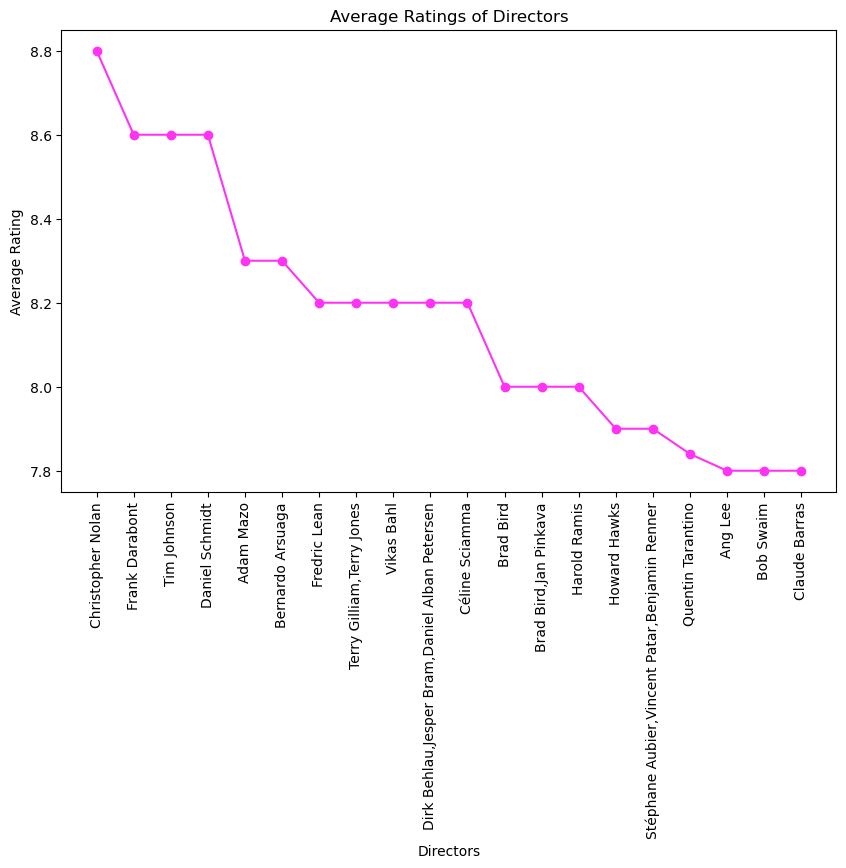

In [42]:
#Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df_director_avgrating['Directors'], df_director_avgrating['Avg IMDb Rating'], marker='o', linestyle='-', 
         color='#ff33f3')
plt.xticks(rotation=90)
plt.xlabel('Directors', fontsize=10)
plt.ylabel('Average Rating', fontsize=10)
plt.title('Average Ratings of Directors')
plt.show()

From the above analysis, Christopher Nolan, Frank Darabonta and Tim Johnson are the top-rated directors with an average rating of 8. 

# Conclusion

Based on the analysis, French movies (original and dubbed) made in Drama, Comedy,
Thriller, and Romance are the most popular. The least tapped genres are News, Short,
Western, and Sport. So, Film makers can make original content in these genres. Among all
the streaming platforms, the least popular genres are Sport, Musical, Western, and War.
These genres are potential opportunities for Canopy, and it could bring a newer set of
audiences. Canopy must make a curated collection of movies with ratings, age groups,
year of release, top directors etc. as highlighted in our analysis.